<a href="https://colab.research.google.com/github/lakshman8664/Computer-Vision/blob/main/EE149_PSET_4_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## uncomment these if you upload this on google drive and mount the drive
# from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# drive.mount('/content/gdrive', force_remount=True)

#### Q1. Loading Data

Run the below cell to load CIFAR-10 train and test data.
Answer the corresponding questions in the overleaf document

In [ ]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

print('# of training samples: {}'.format(len(train_data)))
print('# of test samples: {}'.format(len(test_data)))

## creating data loaders
batch_size = 4 ## set the batch size value
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:03<00:00, 49.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
# of training samples: 50000
# of test samples: 10000


### Helper function
To display images in the training set

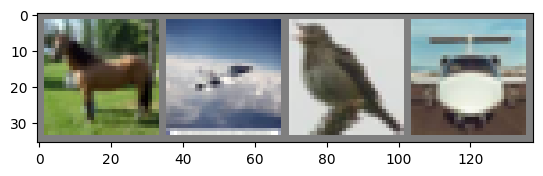

horse plane  bird plane


In [ ]:
# function to display images in the training set
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture

In [ ]:
## Defining Classifier architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU

[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.037
[1, 2250] loss: 1.985
[1, 2500] loss: 1.950
[1, 2750] loss: 1.952
[1, 3000] loss: 1.864
[1, 3250] loss: 1.844
[1, 3500] loss: 1.792
[1, 3750] loss: 1.752
[1, 4000] loss: 1.762
[1, 4250] loss: 1.709
[1, 4500] loss: 1.718
[1, 4750] loss: 1.691
[1, 5000] loss: 1.683
[1, 5250] loss: 1.633
[1, 5500] loss: 1.668
[1, 5750] loss: 1.694
[1, 6000] loss: 1.646
[1, 6250] loss: 1.564
[1, 6500] loss: 1.600
[1, 6750] loss: 1.553
[1, 7000] loss: 1.555
[1, 7250] loss: 1.519
[1, 7500] loss: 1.527
[1, 7750] loss: 1.530
[1, 8000] loss: 1.506
[1, 8250] loss: 1.533
[1, 8500] loss: 1.494
[1, 8750] loss: 1.486
[1, 9000] loss: 1.533
[1, 9250] loss: 1.511
[1, 9500] loss: 1.477
[1, 9750] loss: 1.478
[1, 10000] loss: 1.400
[1, 10250] loss: 1.469
[1, 10500] loss: 1.457
[1, 10750] loss: 1.429
[1, 11000] loss: 1.418
[1, 11250] loss: 1.460
[1, 115

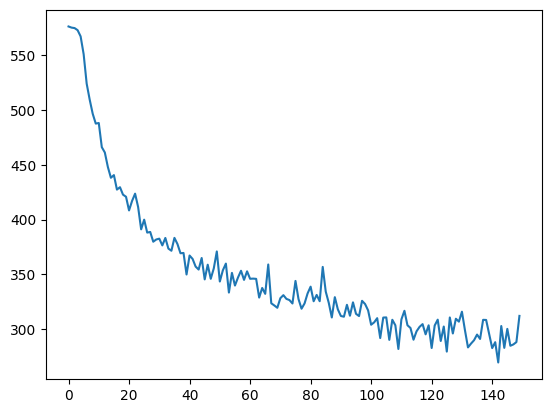

In [ ]:

### Complete the code in the training box
## for reproducibility
torch.manual_seed(7)
np.random.seed(7)
## Instantiating classifier
device = torch.device("cpu")
net = Net()#.cuda()
net.to(device)
## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
## Defining Training Parameters
num_epochs = 3 # 3 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs): # loop over`
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    #===============================================#
    # Fill in the training loop here.
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #===============================================#
    # print statistics
    running_loss += loss.cpu().item()
    if i % 250 == 249: # print every 250 mini-batches
      print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1,
      running_loss / 250))
      running_loss_list.append(running_loss)
      running_loss = 0.0

print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
## complete code
  plt.plot(running_loss_list)

plot_loss_curve(running_loss_list)


(ii) Paste the above code in the code block below and modify it to use GPUs for training


In [ ]:
## for reproducibility
torch.manual_seed(7)
np.random.seed(7)
## Instantiating classifier
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net.to(device)

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
## Defining Training Parameters
num_epochs = 10 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below
for epoch in range(num_epochs): # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data
    #===============================================#
    # Fill in the training loop here.
    inputs, labels = inputs.to(device), labels.to(device)
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #===============================================#
    # print statistics
    running_loss += loss.cpu().item()
    if i % 250 == 249: # print every 250 mini-batches
      print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1,
      running_loss / 250))
      running_loss_list.append(running_loss)
      running_loss = 0.0
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)


[1, 250] loss: 2.304
[1, 500] loss: 2.300
[1, 750] loss: 2.298
[1, 1000] loss: 2.290
[1, 1250] loss: 2.268
[1, 1500] loss: 2.203
[1, 1750] loss: 2.095
[1, 2000] loss: 2.036
[1, 2250] loss: 1.986
[1, 2500] loss: 1.949
[1, 2750] loss: 1.952
[1, 3000] loss: 1.863
[1, 3250] loss: 1.843
[1, 3500] loss: 1.790
[1, 3750] loss: 1.751
[1, 4000] loss: 1.762
[1, 4250] loss: 1.710
[1, 4500] loss: 1.718
[1, 4750] loss: 1.692
[1, 5000] loss: 1.684
[1, 5250] loss: 1.633
[1, 5500] loss: 1.668
[1, 5750] loss: 1.696
[1, 6000] loss: 1.646
[1, 6250] loss: 1.574
[1, 6500] loss: 1.601
[1, 6750] loss: 1.551
[1, 7000] loss: 1.563
[1, 7250] loss: 1.519
[1, 7500] loss: 1.530
[1, 7750] loss: 1.535
[1, 8000] loss: 1.509
[1, 8250] loss: 1.537
[1, 8500] loss: 1.489
[1, 8750] loss: 1.494
[1, 9000] loss: 1.541
[1, 9250] loss: 1.520
[1, 9500] loss: 1.474
[1, 9750] loss: 1.477
[1, 10000] loss: 1.410
[1, 10250] loss: 1.474
[1, 10500] loss: 1.456
[1, 10750] loss: 1.433
[1, 11000] loss: 1.423
[1, 11250] loss: 1.472
[1, 115

### Testing the network

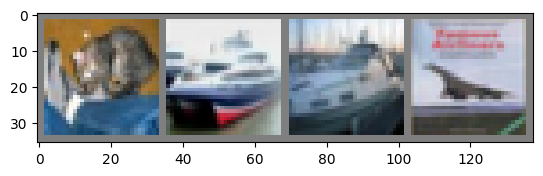

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car plane  ship


<ipython-input-7-9e786c2a8a27>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


In [ ]:
## displaying images from test set
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set.

In [ ]:
### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = correct/total*100 ## stores the accuracy computed in the above loop
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 62 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set.

In [ ]:
def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
    """
    INPUTS:
    train_loader: DataLoader for training data.
    num_epochs: Number of training epochs.
    use_gpu: If True, use GPU for training.
    lr: Learning rate for SGD optimizer.
    momentum: Momentum for SGD optimizer.
    model_save_path: Path to save the trained model.

    OUTPUTS:
    Returns running_loss_list: List storing the loss averaged over a minibatch of size 250.
    """

    # Set up device
    device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")

    # Instantiate model, loss function, and optimizer
    net = Net().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

    # Track running loss
    running_loss_list = []

    # Training loop
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track running loss
            running_loss += loss.cpu().item()
            if i % 250 == 249:  # Print every 250 mini-batches
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 250:.3f}")
                running_loss_list.append(running_loss / 250)
                running_loss = 0.0

    print("Training Complete")
    # Save model
    torch.save(net.state_dict(), model_save_path)
    return running_loss_list


def test(test_loader=test_loader, model_path='./net.pth'):
    """
    INPUTS:
    test_loader: DataLoader for test data.
    model_path: Path to the trained model.

    OUTPUTS:
    Prints the accuracy of the model on the test dataset.
    """
    # Set up device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # Load the trained model
    net = Net()
    net.load_state_dict(torch.load(model_path))
    net.to(device)
    net.eval()  # Set to evaluation mode

    # Evaluate accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    acc = correct / total * 100
    print(f"Accuracy of the network on the test images: {acc:.2f} %")
    return acc





Training with Batch Size 4 and 5 Epochs
[Epoch 1, Batch 250] loss: 2.302
[Epoch 1, Batch 500] loss: 2.304
[Epoch 1, Batch 750] loss: 2.299
[Epoch 1, Batch 1000] loss: 2.294
[Epoch 1, Batch 1250] loss: 2.281
[Epoch 1, Batch 1500] loss: 2.226
[Epoch 1, Batch 1750] loss: 2.132
[Epoch 1, Batch 2000] loss: 2.098
[Epoch 1, Batch 2250] loss: 2.033
[Epoch 1, Batch 2500] loss: 1.993
[Epoch 1, Batch 2750] loss: 1.955
[Epoch 1, Batch 3000] loss: 1.882
[Epoch 1, Batch 3250] loss: 1.839
[Epoch 1, Batch 3500] loss: 1.774
[Epoch 1, Batch 3750] loss: 1.816
[Epoch 1, Batch 4000] loss: 1.755
[Epoch 1, Batch 4250] loss: 1.743
[Epoch 1, Batch 4500] loss: 1.720
[Epoch 1, Batch 4750] loss: 1.677
[Epoch 1, Batch 5000] loss: 1.680
[Epoch 1, Batch 5250] loss: 1.679
[Epoch 1, Batch 5500] loss: 1.660
[Epoch 1, Batch 5750] loss: 1.626
[Epoch 1, Batch 6000] loss: 1.577
[Epoch 1, Batch 6250] loss: 1.594
[Epoch 1, Batch 6500] loss: 1.644
[Epoch 1, Batch 6750] loss: 1.662
[Epoch 1, Batch 7000] loss: 1.603
[Epoch 1, 

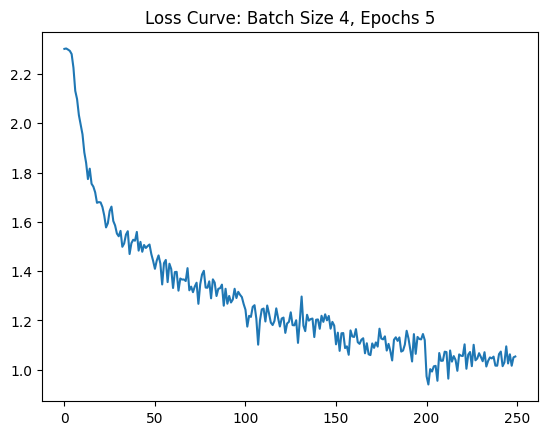

<ipython-input-9-4c1cd85086d6>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(model_path))


Accuracy of the network on the test images: 60.75 %
Accuracy for Batch Size 4, Epochs 5: 60.75%

Training with Batch Size 16 and 5 Epochs
[Epoch 1, Batch 250] loss: 2.303
[Epoch 1, Batch 500] loss: 2.291
[Epoch 1, Batch 750] loss: 2.249
[Epoch 1, Batch 1000] loss: 2.167
[Epoch 1, Batch 1250] loss: 2.079
[Epoch 1, Batch 1500] loss: 2.006
[Epoch 1, Batch 1750] loss: 1.952
[Epoch 1, Batch 2000] loss: 1.896
[Epoch 1, Batch 2250] loss: 1.856
[Epoch 1, Batch 2500] loss: 1.804
[Epoch 1, Batch 2750] loss: 1.784
[Epoch 1, Batch 3000] loss: 1.738
[Epoch 2, Batch 250] loss: 1.686
[Epoch 2, Batch 500] loss: 1.663
[Epoch 2, Batch 750] loss: 1.644
[Epoch 2, Batch 1000] loss: 1.627
[Epoch 2, Batch 1250] loss: 1.598
[Epoch 2, Batch 1500] loss: 1.592
[Epoch 2, Batch 1750] loss: 1.583
[Epoch 2, Batch 2000] loss: 1.537
[Epoch 2, Batch 2250] loss: 1.539
[Epoch 2, Batch 2500] loss: 1.525
[Epoch 2, Batch 2750] loss: 1.496
[Epoch 2, Batch 3000] loss: 1.494
[Epoch 3, Batch 250] loss: 1.437
[Epoch 3, Batch 500

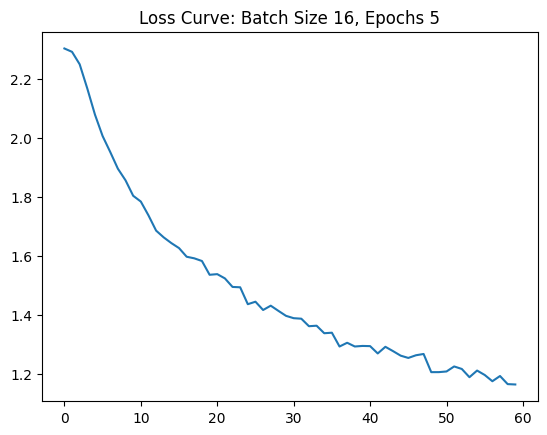

Accuracy of the network on the test images: 57.56 %
Accuracy for Batch Size 16, Epochs 5: 57.56%

Training with Batch Size 16 and 20 Epochs
[Epoch 1, Batch 250] loss: 2.303
[Epoch 1, Batch 500] loss: 2.302
[Epoch 1, Batch 750] loss: 2.302
[Epoch 1, Batch 1000] loss: 2.298
[Epoch 1, Batch 1250] loss: 2.291
[Epoch 1, Batch 1500] loss: 2.259
[Epoch 1, Batch 1750] loss: 2.144
[Epoch 1, Batch 2000] loss: 2.016
[Epoch 1, Batch 2250] loss: 1.991
[Epoch 1, Batch 2500] loss: 1.930
[Epoch 1, Batch 2750] loss: 1.864
[Epoch 1, Batch 3000] loss: 1.836
[Epoch 2, Batch 250] loss: 1.772
[Epoch 2, Batch 500] loss: 1.720
[Epoch 2, Batch 750] loss: 1.677
[Epoch 2, Batch 1000] loss: 1.645
[Epoch 2, Batch 1250] loss: 1.630
[Epoch 2, Batch 1500] loss: 1.608
[Epoch 2, Batch 1750] loss: 1.592
[Epoch 2, Batch 2000] loss: 1.585
[Epoch 2, Batch 2250] loss: 1.562
[Epoch 2, Batch 2500] loss: 1.563
[Epoch 2, Batch 2750] loss: 1.546
[Epoch 2, Batch 3000] loss: 1.512
[Epoch 3, Batch 250] loss: 1.489
[Epoch 3, Batch 5

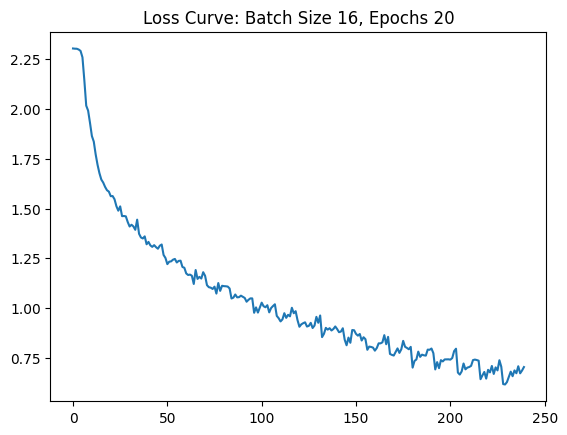

Accuracy of the network on the test images: 63.37 %
Accuracy for Batch Size 16, Epochs 20: 63.37%

Training with Batch Size 4 and 20 Epochs
[Epoch 1, Batch 250] loss: 2.304
[Epoch 1, Batch 500] loss: 2.302
[Epoch 1, Batch 750] loss: 2.301
[Epoch 1, Batch 1000] loss: 2.294
[Epoch 1, Batch 1250] loss: 2.275
[Epoch 1, Batch 1500] loss: 2.225
[Epoch 1, Batch 1750] loss: 2.115
[Epoch 1, Batch 2000] loss: 2.063
[Epoch 1, Batch 2250] loss: 2.028
[Epoch 1, Batch 2500] loss: 1.971
[Epoch 1, Batch 2750] loss: 1.942
[Epoch 1, Batch 3000] loss: 1.864
[Epoch 1, Batch 3250] loss: 1.763
[Epoch 1, Batch 3500] loss: 1.832
[Epoch 1, Batch 3750] loss: 1.793
[Epoch 1, Batch 4000] loss: 1.716
[Epoch 1, Batch 4250] loss: 1.727
[Epoch 1, Batch 4500] loss: 1.711
[Epoch 1, Batch 4750] loss: 1.687
[Epoch 1, Batch 5000] loss: 1.639
[Epoch 1, Batch 5250] loss: 1.648
[Epoch 1, Batch 5500] loss: 1.645
[Epoch 1, Batch 5750] loss: 1.618
[Epoch 1, Batch 6000] loss: 1.657
[Epoch 1, Batch 6250] loss: 1.629
[Epoch 1, Bat

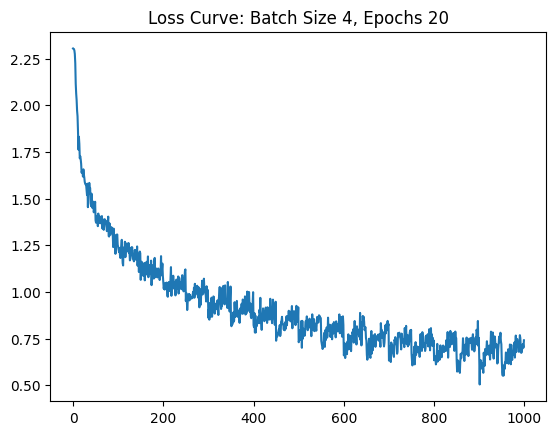

Accuracy of the network on the test images: 59.91 %
Accuracy for Batch Size 4, Epochs 20: 59.91%


In [ ]:
# GPU Setup
use_gpu = True

# Configurations
configurations = [
    {"batch_size": 4, "num_epochs": 5},
    {"batch_size": 16, "num_epochs": 5},
    {"batch_size": 16, "num_epochs": 20},
    {"batch_size": 4, "num_epochs": 20}
]

for config in configurations:
    print(f"\nTraining with Batch Size {config['batch_size']} and {config['num_epochs']} Epochs")

    # Update data loaders with specified batch size
    train_loader = torch.utils.data.DataLoader(
        train_data, batch_size=config["batch_size"], shuffle=True, num_workers=2
    )
    test_loader = torch.utils.data.DataLoader(
        test_data, batch_size=config["batch_size"], shuffle=False, num_workers=2
    )

    # Train the model
    loss_list = train(
        train_loader=train_loader,
        num_epochs=config["num_epochs"],
        use_gpu=use_gpu,
        model_save_path=f"./net_bs{config['batch_size']}_e{config['num_epochs']}.pth"
    )

    # Plot loss curve for the current configuration
    plt.figure()
    plot_loss_curve(loss_list)
    plt.title(f"Loss Curve: Batch Size {config['batch_size']}, Epochs {config['num_epochs']}")
    plt.show()

    # Test the model
    acc = test(
        test_loader=test_loader,
        model_path=f"./net_bs{config['batch_size']}_e{config['num_epochs']}.pth"
    )

    print(f"Accuracy for Batch Size {config['batch_size']}, Epochs {config['num_epochs']}: {acc:.2f}%")
